# Topo - Import a csv file in a geopackage
O. KAUFMANN, 2021.

In [1]:
import pandas as pd
import geopandas as gpd

### Read text file into a pandas dataframe

In [2]:
df = pd.read_csv('./data_gis/example_GRAV_bouguer_mga55.xyz', sep='\t', header=None, names=['X', 'Y', 'dg'])

In [3]:
df.head()

,X,Y,dg
0,384302.181339,5.344813e+06,-24.61
1,384472.181705,5.344743e+06,-24.64
2,384672.182200,5.344713e+06,-24.72
3,384966.182873,5.344624e+06,-25.42
4,384742.183147,5.345333e+06,-24.14


### Convert dataframe to geodataframe

In [4]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y))

/home/su530201/.local/share/virtualenvs/bootsoff-ZwsUKyZD/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

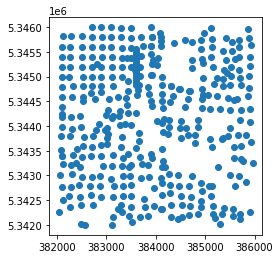

In [5]:
gdf.plot()

### Save as a layer in a geopackage

In [6]:
gdf.to_file('./data_gis/test.gpkg', layer='bouguer', driver='GPKG')

### Reload as geodataframe

In [7]:
bouguer = gpd.read_file('./data_gis/test.gpkg', layer='bouguer')

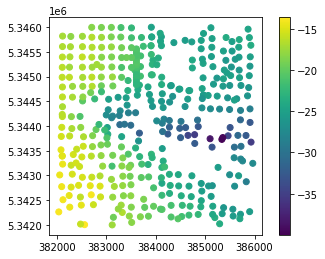

In [14]:
bouguer.plot(column='dg', aspect=1, legend=True);